In [1]:
# Correlation Analysis

In [26]:
%matplotlib inline
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [2]:
ticker = "ITW"

In [13]:
price_data_1 = pd.read_csv("FundPerformance.csv")

In [5]:
price_data_2 = yf.download(ticker, start = "2000-01-01")

[*********************100%***********************]  1 of 1 completed


In [14]:
price_data_1 = price_data_1.set_index("Date")

In [15]:
price_data_1["SSIF Portfolio"] = price_data_1["SSIF Portfolio"]/100 + 1

,SSIF Portfolio,SSIF Benchmark,Excess Return
Date,,,
2019-01-07 0:00,1.001905,0.267576,-0.077053
2019-01-08 0:00,1.010252,1.024206,0.000980
2019-01-09 0:00,1.019144,1.577965,0.336389
2019-01-10 0:00,1.022896,2.056171,0.233405
2019-01-11 0:00,1.021794,2.265036,-0.085640
...,...,...,...
2021-12-27 0:00,2.126129,80.564125,32.048817
2021-12-28 0:00,2.133514,80.679417,32.672030
2021-12-29 0:00,2.133976,81.095107,32.302518


In [37]:
price_data_1.index = pd.to_datetime(price_data_1.index)

In [38]:
combined_data = pd.merge(price_data_1["SSIF Portfolio"], price_data_2["Adj Close"], left_index = True, right_index = True)

In [39]:
combined_data

,SSIF Portfolio,Adj Close
Date,,
2019-01-07,1.001905,118.278641
2019-01-08,1.010252,120.882042
2019-01-09,1.019144,120.863449
2019-01-10,1.022896,122.211655
2019-01-11,1.021794,121.160980
...,...,...
2021-12-27,2.126129,242.526489
2021-12-28,2.133514,244.496719
2021-12-29,2.133976,245.850006


In [56]:
# Take log returns of daily price change
adj_data_1 = np.log(combined_data.iloc[1:]["SSIF Portfolio"].values/combined_data.iloc[:-1]["SSIF Portfolio"].values)
adj_data_2 = np.log(combined_data.iloc[1:]["Adj Close"].values/combined_data.iloc[:-1]["Adj Close"].values)

In [57]:
combined_data.loc[combined_data.index[1]:, "SSIF Portfolio"] = adj_data_1
combined_data.loc[combined_data.index[1]:, "Adj Close"] = adj_data_2
combined_data = combined_data.dropna().loc[combined_data.index[1]:,:]

In [58]:
combined_data.corr()

,SSIF Portfolio,Adj Close
SSIF Portfolio,1.000000,0.705683
Adj Close,0.705683,1.000000


In [60]:
# Calculate trailing 6-month correlation between the SSIF and the stock
times = combined_data.index
year = datetime.timedelta(days = 182)
corrs = []
for i in combined_data[times[0] + year:].index:
    corrs.append([i,combined_data[i - year:i].corr().iloc[0][1]])


In [61]:
corrs = np.array(corrs)
corrs

array([[Timestamp('2019-07-09 00:00:00'), 0.536487027130261],
       [Timestamp('2019-07-10 00:00:00'), 0.5278478050718867],
       [Timestamp('2019-07-11 00:00:00'), 0.5340374554510103],
       ...,
       [Timestamp('2021-12-29 00:00:00'), 0.44454932590442087],
       [Timestamp('2021-12-30 00:00:00'), 0.44495324417829685],
       [Timestamp('2021-12-31 00:00:00'), 0.43784366027012767]],
      dtype=object)

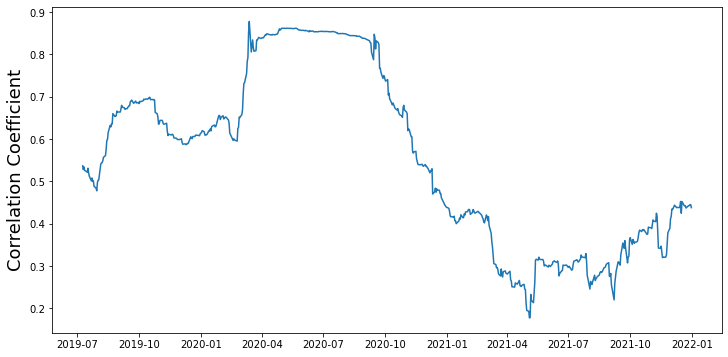

In [65]:
# Plot correlation coefficient over last 2 years
fig = plt.figure(figsize = (12,6))
ax = plt.axes()

ax.set_ylabel("Correlation Coefficient")
ax.yaxis.label.set_color("black")
ax.yaxis.label.set_size(18)

ax.tick_params(axis = 'x', colors = "black")
ax.tick_params(axis = 'y', colors = "black")

ax.plot(corrs[:,0], corrs[:,1]);

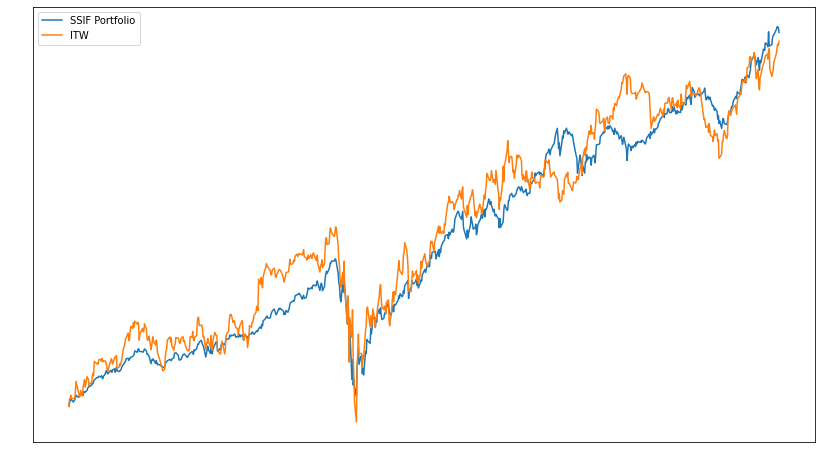

In [64]:
# Plot price chart of the SSIF and the stock
combined_data = pd.merge(price_data_1["SSIF Portfolio"], price_data_2["Adj Close"], left_index = True, right_index = True)

fig = plt.figure(figsize = (14,8))
ax = plt.axes()

ax.tick_params(axis = 'x', colors = "white")
ax.tick_params(axis = 'y', colors = "white")

ax.plot(combined_data["SSIF Portfolio"]/(combined_data.iloc[0]["SSIF Portfolio"]/combined_data.iloc[0]["Adj Close"]), label = "SSIF Portfolio")
ax.plot(combined_data["Adj Close"], label = ticker)

leg = ax.legend();